

# Import libraries.


In [1]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import os
import cv2
#tesor fow & keras
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2     
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D
from tensorflow.keras.applications import  Xception,VGG16,InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

#cnn
from tensorflow.keras import datasets, layers, models

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.engine.base_layer import Layer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
seed = 42
np.random.seed =seed

In [6]:
image_path = 'C:/Users/naima/OneDrive - Georgia State University/spring 2022-naimaspc/Data Mining/Project/dataset/'


# Inspiration

Breast cancer is the most common form of cancer in women, and invasive ductal carcinoma (IDC) is the most common form of breast cancer. Accurately identifying and categorizing breast cancer subtypes is an important clinical task, and automated methods can be used to save time and reduce error.<p></p>
I hope you find this NoteBook helpful and some <span  style="color:crimson ;">**UPVOTES** </span>would be appreciated.

# What is Breast cancer ? ✔✔



**Breast cancer is cancer that forms in the cells of the breasts.**

After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.

Substantial support for breast cancer awareness and research funding has helped created advances in the diagnosis and treatment of breast cancer. Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.
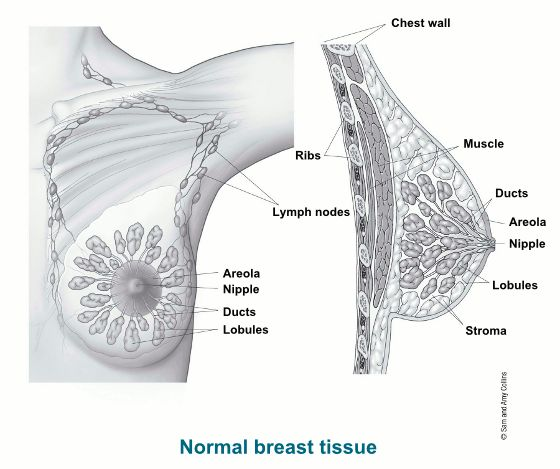


# Helper Functions .

 i make this  helper functions to make my code easy  and organiezed  as below ⏬
1.    function to load image and labels .
2.    function to identify our labels.

In [7]:
# here in this function i collect my data depending on label name 
# 0 is non infected
# 1 is infected
labels = ['0','1']

# to load image  linked with labels from dirictory
def load_images_from_directory(main_dirictory):
    total_labels=[]
    images =[]
    pathes =[]
    total_normal=0
    total_infected=0
    folders  = os.listdir(main_dirictory) 
    for i,file in enumerate(folders)  :
        if file == 'IDC_regular_ps50_idx5':
            continue 
        for lab in labels :
            full_path = main_dirictory+""
            for image in os.listdir(full_path):
                img = cv2.imread(full_path+'/'+image)
                img = cv2.resize(img,(50,50))
                images.append(img)
                pathes.append(full_path+'/'+image)
                if lab  == '0':
                        label = 0
                        total_normal+= 1
                elif lab == '1' :
                        label = 1
                        total_infected +=1
                total_labels.append(label)
    print('total normal image       := ',total_normal)
    print('total Infected image     := ',total_infected)
    return shuffle(images,total_labels,pathes,random_state=756349782)

# get label Name   
def get_Label(number):
    labels = {0:'Uninfected', 1:'Infected'}
    return labels[number]

# Data Preperation.
Load Labels
*   collect all image label and add it in data frame.

Load Images
*   Train images
*   Test images

In [8]:
images,all_labels,pathes =  load_images_from_directory(image_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/naima/OneDrive - Georgia State University/spring 2022-naimaspc/Data Mining/Project/dataset/0\\0'

Due to Hardware limitation , i will reduce image count to procced my model.

In [ ]:
images=images[0:150000]
all_labels=all_labels[0:150000]
pathes =pathes[0:150000]
print('Total Images :',len(images))
print('Total Labels :',len(all_labels))
print('Total Pathes',len(pathes))


In [ ]:
#creat data frame to save each image with its label 
df =pd.DataFrame({
    'image_path':pathes,
    'label':all_labels,
    
})
df.head(5)

In [ ]:
df.shape

In [ ]:
df['label'].value_counts()

# Virsialization  Images 


1.   visualize images .
2.   visualize labels to check is data  balanced or Not.



In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle(" Images", fontsize=20)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(all_labels[i]))
    plt.imshow(images[i], cmap=plt.cm.binary)

In [ ]:
plt.title(' Labels Visualization')
sns.countplot(x=all_labels,palette='flare')
plt.show()

*   From above Visualization <span style="color:crimson;"> **We Find Data is Totally Not Balnced** </span> & that will cause proplem for predection , so i will try to  Balance data First  to make my model be faire for the 2 Classes  .

In [ ]:
df_infected  = df[df['label']==1]
df_uninfected= df[df['label']==0]

# Data Prepocessing


1.   Data speliting
2.   Data Normalization 
3.   Data Balansing



In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(images,all_labels ,random_state=42,shuffle=True,test_size=0.3)

In [ ]:
x_train = np.asarray(x_train,np.float32)/255
x_test  = np.asarray(x_test,np.float32) /255
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

In [ ]:
print('Train Images shape is   : ',x_train.shape)
print('Train  Labels  shape is : ',y_train.shape)

In [ ]:
print('Test Images shape is   : ',x_test.shape)
print('Test  Labels  shape is : ',y_test.shape)

In [ ]:
plt.title('Test  Labels Visualization')
sns.countplot(x=y_test,palette='flare')
plt.show()

In [ ]:
plt.title('Train  Labels Visualization')
sns.countplot(x=y_train,palette='flare')
plt.show()

#  Data  Balancing :👀 👀

The Imbalanced classification problem is what we face when there is a severe skew in the class distribution of our training data. Okay, the skew may not be extremely severe (it can vary), but the reason we identify imbalanced classification as a problem is because it can influence the performance on our Machine Learning algorithms.
One way the imbalance may affect our Machine Learning algorithm is when our algorithm completely ignores the minority class. The reason this is an issue is because the minority class is often the class that we are most interested in. For instance, when building a classifier to classify fraudulent and non-fraudulent transactions from various observations, the data is likely to have more non-fraudulent transactions than that of fraud — I mean think about it, it would be very worrying if we had an equal amount of fraudulent transactions as non-fraud.

**Types** :-

An approach to combat this challenge is Random Sampling. There are two main ways to perform random resampling, both of which have there pros and cons:



1.   Oversampling — Duplicating samples from the minority class

2.  Undersampling — Deleting samples from the majority class.







 here i will use  undersampling methods. 



In [ ]:
# convert  Data  to 1D for  compatability downsampling method
shape = 50*50*3
x_train = x_train.reshape(x_train.shape[0],shape )
x_test  = x_test.reshape(x_test.shape[0], shape)

In [ ]:
print('shape of new train data is :',x_train.shape)
print('shape of new Test data is :',x_test.shape)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#call module
underampler = RandomUnderSampler(sampling_strategy='auto') 
#fit data to model
x_train_fit, y_train_fit = underampler.fit_resample(x_train, y_train)
X_test_fit,  Y_test_fit   = underampler.fit_resample(x_test, y_test)
# return data to its original shape
x_train_ = x_train_fit.reshape(x_train_fit.shape[0],50,50,3)
x_test_  = X_test_fit.reshape(X_test_fit.shape[0], 50,50,3)


#  Visualization after Sampling Data :

In [ ]:
plt.title('Train  Labels Visualization')
sns.countplot(x=y_train_fit,palette='flare')
plt.show()

In [ ]:
plt.title('Test  Labels Visualization')
sns.countplot(x=Y_test_fit,palette='flare')
plt.show()

In [ ]:
print("Train data shape =",x_train_.shape)
print(" Test data shape =",x_test_.shape)

Now Data Is Totaly Balanced Lets model it .

# Buliding CNN Model

**i will use Data augmentation,as it  is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.** 



In [ ]:
batch_size = 32
#create image generator for images 
image_gen = ImageDataGenerator(
                                  shear_range = 0.2,
                                  zoom_range = 0.3,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest',
                                   horizontal_flip=True,
                                   rotation_range = 20, 
                            
                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(  
                                  shear_range = 0.2,
                                  zoom_range = 0.3,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest',
                                   horizontal_flip=True,
                                   rotation_range = 20,)

        
train = image_gen.flow(
      x_train_,
      y_train_fit,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      x_test_,
      Y_test_fit,
      shuffle=True, 
      batch_size=batch_size
      )


In [ ]:
# get shape of train data 
for train_img , train_label in train :
    print('image shape ',train_img.shape)
    print('label  shape ',train_label.shape)
    break 
    

In [ ]:
# get shape of train data 
for t_img , t_label in test :
    print('image shape ',t_img.shape)
    print('label  shape ',t_label.shape)
    break 

In [ ]:
#start bulding CNN Model
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=(50,50,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2)) 
cnn_model.add(BatchNormalization())
cnn_model.add(layers.Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2)) 
cnn_model.add(layers.Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2)) 
cnn_model.add(BatchNormalization())
cnn_model.summary()

In [ ]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1024, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(layers.Dense(1024, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(layers.Dense(1, activation ='sigmoid'))
cnn_model.summary()

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

  **1-Defining Callbacks**

*   A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc)


**2-Reduce Learning Rate on Plateau**
*   Is used to reduce the learning rate when a metric has stopped improving.

In [ ]:
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = cnn_model.fit(
    train,
    epochs=150,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =n_training_samples//batch_size,
    shuffle = True,
    callbacks=callbacks_list
    )

In [ ]:
score, acc = cnn_model.evaluate(test,batch_size=batch_size)                       
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
cnn_prediction = cnn_model.predict(test)

In [ ]:
cnn_prediction[1:10]

In [ ]:
cnn_prediction = cnn_model.predict_generator(t_img)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('f1 score ',f1_score(cnn_prediction.round(),t_label,average='micro'))
print('recall ',recall_score(cnn_prediction.round(),t_label,average=None))
print('precision ',precision_score(cnn_prediction.round(),t_label,average=None))


#  Ensemble Model:
 i traied to buld Ensemble Model to  increase  model accuarcy ,lets see what happen.

In [ ]:
def ensemble(models, model_input):
    Models_output=[model(model_input) for model in models]
    Avg = keras.layers.average(Models_output)
    modelEnsemble = Model(inputs=model_input, outputs=Avg, name='ensemble')
    modelEnsemble.summary()
    modelEnsemble.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return modelEnsemble

In [ ]:
inputs_shape = (50,50,3)
def get_model_1():

    cnn_model = Sequential()
    # cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(128,(3,3),padding ='Same',activation = 'relu',input_shape=inputs_shape))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(256,(3,3) ,padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(512,(3,3),padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2)) 
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(2048,(3,3) ,padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization()) 
    cnn_model.add(layers.Conv2D(2048,(3,3) ,padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization()) 
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(1024, activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Dense(1, activation ='sigmoid'))
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model
def get_model_2():
    # cnn_model = models.Sequential()
    cnn_model = Sequential()
    # cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(128,(3,3),padding ='Same',activation = 'relu',input_shape=inputs_shape))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(256,(3,3) ,padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(512,(3,3),padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2)) 
    cnn_model.add(BatchNormalization())
    # cnn_model.add(layers.Conv2D(512,(3,3) ,padding ='same',activation='relu'))
    # cnn_model.add(layers.MaxPooling2D(2,2))
    # cnn_model.add(BatchNormalization()) 
    # cnn_model.add(layers.Conv2D(1024,(3,3) ,padding ='same',activation='relu'))
    # cnn_model.add(layers.MaxPooling2D(2,2))
    # cnn_model.add(BatchNormalization()) 
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(1024, activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Dense(512, activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.2))
    cnn_model.add(layers.Dense(1, activation ='sigmoid'))
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model

def get_model_3():
    cnn_model = Sequential()
    # cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=inputs_shape))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(512,(3,3) ,padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(layers.Conv2D(512,(3,3),padding ='same',activation='relu'))
    cnn_model.add(layers.MaxPooling2D(2,2)) 
    cnn_model.add(BatchNormalization())
    # cnn_model.add(layers.Conv2D(1024,(3,3) ,padding ='same',activation='relu'))
    # cnn_model.add(layers.MaxPooling2D(2,2))
    # cnn_model.add(BatchNormalization()) 
    # cnn_model.add(layers.Conv2D(1024,(3,3) ,padding ='same',activation='relu'))
    # cnn_model.add(layers.MaxPooling2D(2,2))
    # cnn_model.add(BatchNormalization()) 
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(1024, activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.2))
    cnn_model.add(layers.Dense(2048, activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.2))
    cnn_model.add(layers.Dense(1, activation ='sigmoid'))
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model
models = []
model_1=get_model_1()
model_2=get_model_2()
model_3=get_model_3()
model_1._name = 'Model_1'
model_2._name = 'Model_2'
model_3._name = 'Model_3'
models.append(model_1)
models.append(model_2)
models.append(model_3)
model_input = Input(shape=models[0].input_shape[1:])
ensemble_model = ensemble(models, model_input)

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(ensemble_model, to_file='ensemble_model.png', show_shapes=True)

In [ ]:
ensemble_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = ensemble_model.fit(
    train,
    epochs=150,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =n_training_samples//batch_size,
    shuffle = True,
    callbacks=callbacks_list
    )

In [ ]:
ensemble_model.evaluate(test)

In [ ]:
ensamble_prediction = ensemble_model.predict(test)

In [ ]:
# cnn_prediction
ensamble_prediction[1:10]


In [ ]:
ens_prediction = cnn_model.predict_generator(t_img)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('f1 score ',f1_score(ens_prediction.round(),t_label,average='micro'))
print('recall ',recall_score(ens_prediction.round(),t_label,average=None))
print('precision ',precision_score(ens_prediction.round(),t_label,average=None))

Thanks for  <span  style="color:crimson ;">**Reviewing**</span>  My kernel also, if you have any comments or suggestion please raise it